#### Import Modules

In [52]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Import Data

In [9]:
# Load the LOS file and add a label column
los_df = pd.read_excel('/kaggle/input/gnss-data/LOS_DATA.xlsx')
los_df['Label'] = 1  # LOS = 1

# Load the NLOS file and add a label column
nlos_df = pd.read_excel('/kaggle/input/gnss-data/NLOS_DATA.xlsx')
nlos_df['Label'] = 0  # NLOS = 0


In [10]:
los_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Year,Month,Date,Hour,Min,Sec,PRN,Elevation,Azimuth,SNR,Label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2023.0,6.0,2.0,0.0,34.0,56.0,GPS/ 8,14.09,177.32,40.22,1
2,2023.0,6.0,2.0,0.0,34.0,58.0,GPS/ 8,14.10,177.31,40.51,1
3,2023.0,6.0,2.0,0.0,35.0,0.0,GPS/ 8,14.10,177.30,40.84,1
4,2023.0,6.0,2.0,0.0,35.0,2.0,GPS/ 8,14.11,177.29,41.04,1


In [11]:
nlos_df.head()

,Year,Month,Date,Hour,Min,Sec,PRN,Elevation,Azimuth,SNR,Label
0,2023,6,1,23,52,0,GPS/ 3,40.53,325.34,48.42,0
1,2023,6,1,23,52,2,GPS/ 3,40.54,325.34,48.34,0
2,2023,6,1,23,52,4,GPS/ 3,40.56,325.33,48.49,0
3,2023,6,1,23,52,6,GPS/ 3,40.57,325.32,48.78,0
4,2023,6,1,23,52,8,GPS/ 3,40.58,325.32,48.84,0


#### Preprocess Data

In [12]:
df = pd.concat([los_df, nlos_df], ignore_index=True) #Combine both files

In [13]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Year,Month,Date,Hour,Min,Sec,PRN,Elevation,Azimuth,SNR,Label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2023.0,6.0,2.0,0.0,34.0,56.0,GPS/ 8,14.09,177.32,40.22,1
2,2023.0,6.0,2.0,0.0,34.0,58.0,GPS/ 8,14.10,177.31,40.51,1
3,2023.0,6.0,2.0,0.0,35.0,0.0,GPS/ 8,14.10,177.30,40.84,1
4,2023.0,6.0,2.0,0.0,35.0,2.0,GPS/ 8,14.11,177.29,41.04,1


In [14]:
df.tail()

,Year,Month,Date,Hour,Min,Sec,PRN,Elevation,Azimuth,SNR,Label
26484,2023.0,6.0,2.0,23.0,50.0,7.0,GPS/ 3,41.49,324.93,49.42,0
26485,2023.0,6.0,2.0,23.0,50.0,7.0,GPS/ 3,41.49,324.93,49.42,0
26486,2023.0,6.0,2.0,23.0,50.0,7.0,GPS/ 3,41.49,324.93,49.42,0
26487,2023.0,6.0,2.0,23.0,50.0,7.0,GPS/ 3,41.49,324.93,49.42,0
26488,2023.0,6.0,2.0,23.0,50.0,7.0,GPS/ 3,41.49,324.93,49.42,0


In [15]:
df = df[['SNR', 'Elevation', 'Azimuth', 'Label']] # Select Required Columns

In [16]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)
# The missing column is from the first line of LOS_Data file

   SNR  Elevation  Azimuth  Label
0  NaN        NaN      NaN      1


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [17]:
df = df.dropna()

In [18]:
X = df[['SNR', 'Elevation', 'Azimuth']]
y = df['Label']

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split

X = df[['SNR', 'Elevation', 'Azimuth']]
y = df['Label']  # 1 = LOS, 0 = NLOS

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


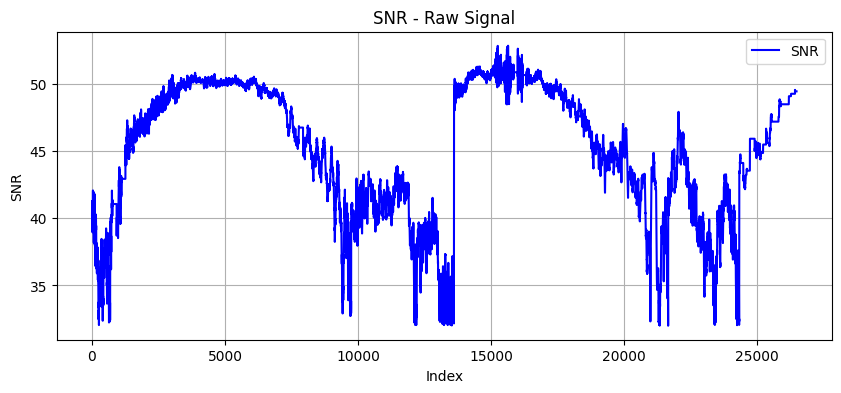

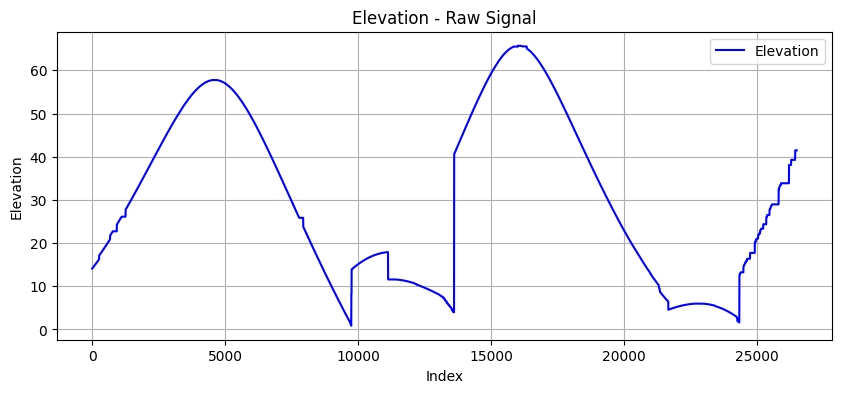

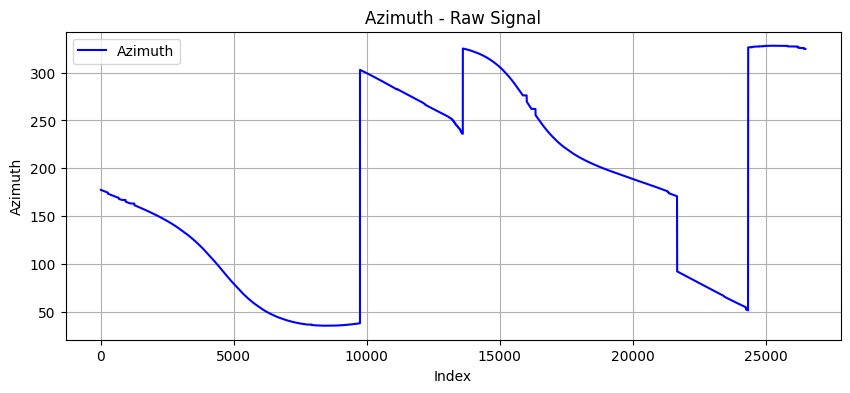

In [21]:
import matplotlib.pyplot as plt

for col in ['SNR', 'Elevation', 'Azimuth']:
    plt.figure(figsize=(10, 4))
    plt.plot(df[col], label=col, color='blue')
    plt.title(f'{col} - Raw Signal')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()
# In the graphs given below the first half is LOS and the other half is NLOS

In [22]:
Q1 = df[['SNR', 'Elevation', 'Azimuth']].quantile(0.25)
Q3 = df[['SNR', 'Elevation', 'Azimuth']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['SNR', 'Elevation', 'Azimuth']] < (Q1 - 1.5 * IQR)) |
            (df[['SNR', 'Elevation', 'Azimuth']] > (Q3 + 1.5 * IQR)))

print("Outlier count per column:\n", outliers.sum())


Outlier count per column:
 SNR          0
Elevation    0
Azimuth      0
dtype: int64


In [23]:
print(df[['SNR', 'Elevation', 'Azimuth']].describe())


                SNR     Elevation       Azimuth
count  26488.000000  26488.000000  26488.000000
mean      45.001800     30.565063    179.893305
std        4.899453     19.579166     99.045589
min       32.010000      0.870000     35.110000
25%       41.400000     11.937500     79.915000
50%       45.800000     28.155000    180.705000
75%       49.610000     48.830000    272.975000
max       52.810000     65.710000    328.260000


/tmp/ipykernel_31/927537145.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted, x='Feature', y='Value', hue='Label', ci='sd', palette='Set2')


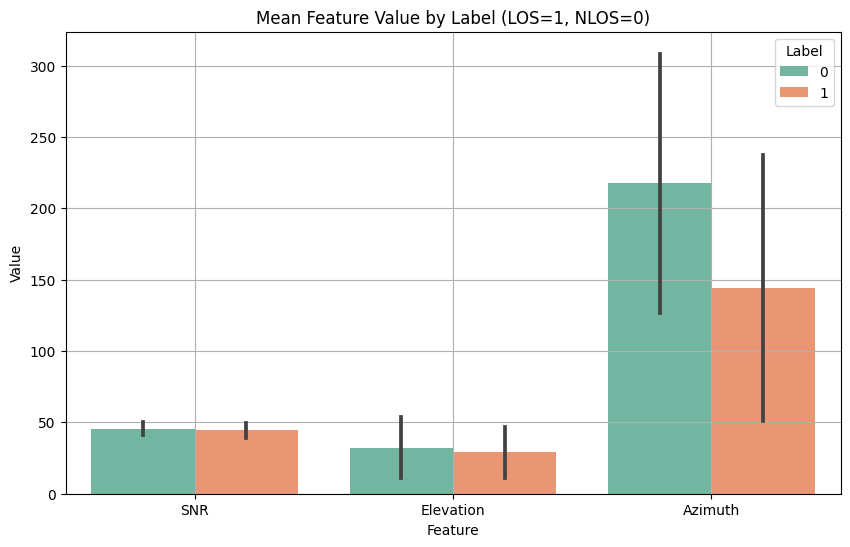

In [24]:
import seaborn as sns

# Combine features and target for plotting
df_melted = df.melt(id_vars='Label', value_vars=['SNR', 'Elevation', 'Azimuth'],
                    var_name='Feature', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Feature', y='Value', hue='Label', ci='sd', palette='Set2')
plt.title('Mean Feature Value by Label (LOS=1, NLOS=0)')
plt.grid(True)
plt.show()


#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

#### Support Vector Machine (SVM)

In [39]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=None, random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### XGBoost

In [28]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

#### Testing Models

In [29]:
from sklearn.metrics import accuracy_score

# Predict on test set
logreg_preds = logreg_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Print accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_preds))
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))


Logistic Regression Accuracy: 0.721593053982635
SVM Accuracy: 0.9867874669686674
Random Forest Accuracy: 1.0
XGBoost Accuracy: 1.0


#### Comparing Models with K-Fold Vaildation

In [35]:
# Use stratified 5-fold cross-validation
k = 5
strat_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


In [36]:
print("Logistic Regression CV Accuracy:", cross_val_score(logreg_model, X, y, cv=strat_kfold).mean())
print("SVM CV Accuracy:", cross_val_score(svm_model, X, y, cv=strat_kfold).mean())
print("Random Forest CV Accuracy:", cross_val_score(rf_model, X, y, cv=strat_kfold).mean())
print("XGBoost CV Accuracy:", cross_val_score(xgb_model, X, y, cv=strat_kfold).mean())


Logistic Regression CV Accuracy: 0.723006455430052
SVM CV Accuracy: 0.9855783236777329
Random Forest CV Accuracy: 1.0
XGBoost CV Accuracy: 1.0



Logistic Regression Performance (Stratified CV)
----------------------------------------
Accuracy: 0.7230

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.71     12881
           1       0.72      0.76      0.74     13607

    accuracy                           0.72     26488
   macro avg       0.72      0.72      0.72     26488
weighted avg       0.72      0.72      0.72     26488



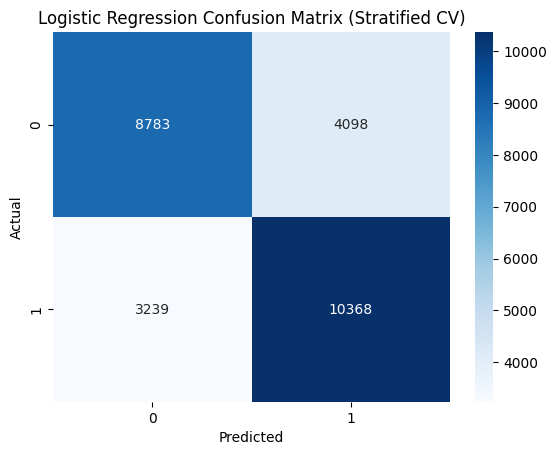


SVM Performance (Stratified CV)
----------------------------------------
Accuracy: 0.9856

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     12881
           1       1.00      0.97      0.99     13607

    accuracy                           0.99     26488
   macro avg       0.99      0.99      0.99     26488
weighted avg       0.99      0.99      0.99     26488



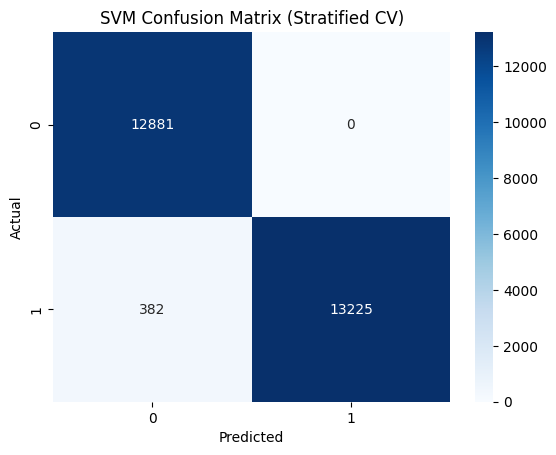


Random Forest Performance (Stratified CV)
----------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12881
           1       1.00      1.00      1.00     13607

    accuracy                           1.00     26488
   macro avg       1.00      1.00      1.00     26488
weighted avg       1.00      1.00      1.00     26488



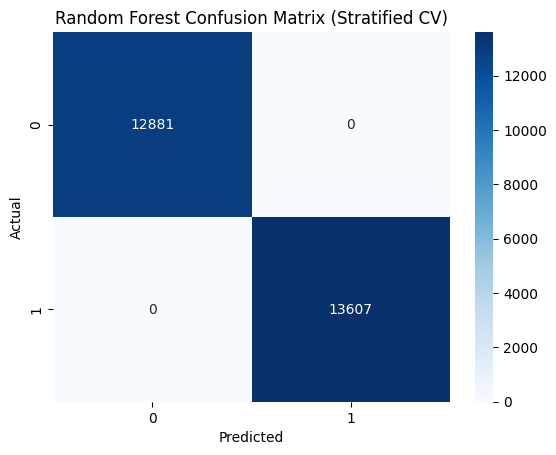


XGBoost Performance (Stratified CV)
----------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12881
           1       1.00      1.00      1.00     13607

    accuracy                           1.00     26488
   macro avg       1.00      1.00      1.00     26488
weighted avg       1.00      1.00      1.00     26488



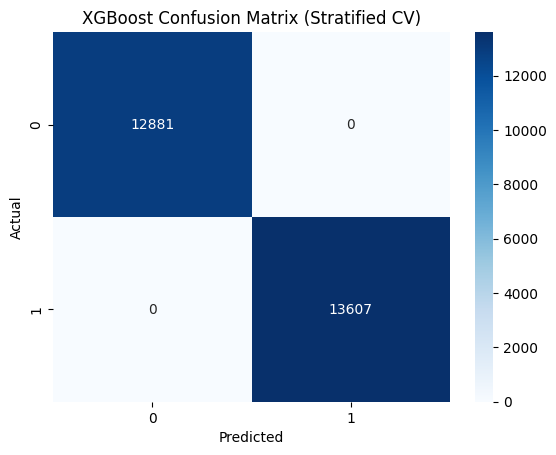

In [53]:
def plot_conf_matrix_cv(model, model_name):
    preds = cross_val_predict(model, X, y, cv=strat_kfold)
    
    # Accuracy
    acc = accuracy_score(y, preds)
    print(f"\n{model_name} Performance (Stratified CV)")
    print("-" * 40)
    print(f"Accuracy: {acc:.4f}")
    
    # Precision, Recall, F1-Score
    print("\nClassification Report:")
    print(classification_report(y, preds, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix (Stratified CV)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Call the function for each model
plot_conf_matrix_cv(logreg_model, "Logistic Regression")
plot_conf_matrix_cv(svm_model, "SVM")
plot_conf_matrix_cv(rf_model, "Random Forest")
plot_conf_matrix_cv(xgb_model, "XGBoost")


In [57]:
logreg_preds = logreg_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_preds))
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))


Logistic Regression Accuracy: 0.721593053982635
SVM Accuracy: 0.9867874669686674
Random Forest Accuracy: 1.0
XGBoost Accuracy: 1.0



Logistic Regression Performance (Test Set)
----------------------------------------
Accuracy: 0.7216

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      2576
           1       0.71      0.76      0.74      2722

    accuracy                           0.72      5298
   macro avg       0.72      0.72      0.72      5298
weighted avg       0.72      0.72      0.72      5298



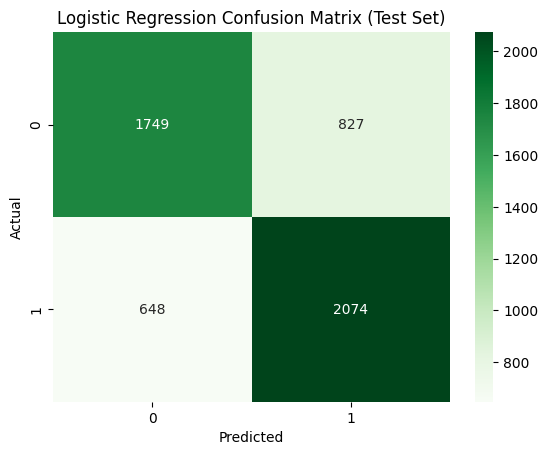


SVM Performance (Test Set)
----------------------------------------
Accuracy: 0.9868

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2576
           1       1.00      0.97      0.99      2722

    accuracy                           0.99      5298
   macro avg       0.99      0.99      0.99      5298
weighted avg       0.99      0.99      0.99      5298



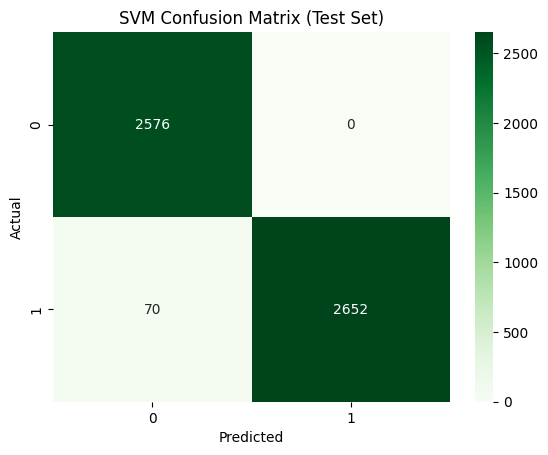


Random Forest Performance (Test Set)
----------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00      2722

    accuracy                           1.00      5298
   macro avg       1.00      1.00      1.00      5298
weighted avg       1.00      1.00      1.00      5298



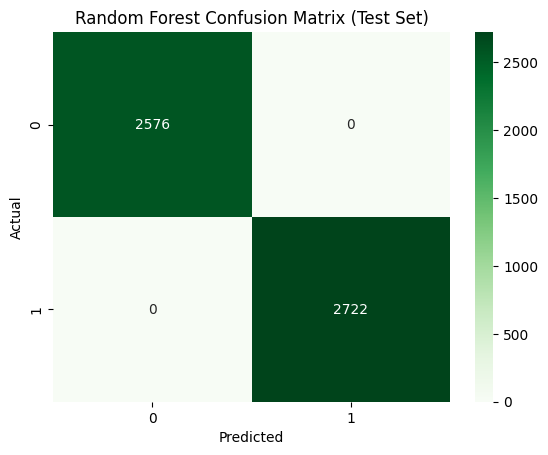


XGBoost Performance (Test Set)
----------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00      2722

    accuracy                           1.00      5298
   macro avg       1.00      1.00      1.00      5298
weighted avg       1.00      1.00      1.00      5298



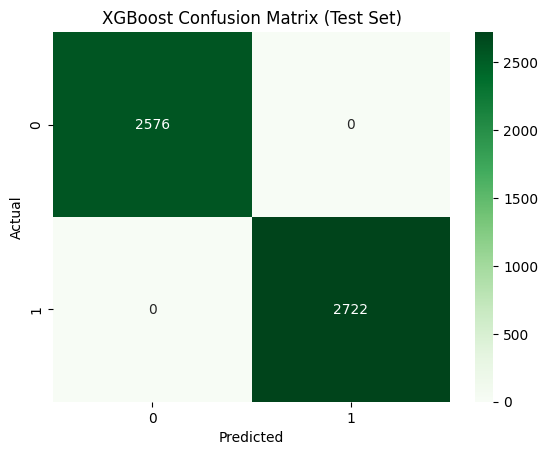

In [58]:
def plot_conf_matrix_test(y_true, y_pred, model_name):
    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"\n{model_name} Performance (Test Set)")
    print("-" * 40)
    print(f"Accuracy: {acc:.4f}")
    
    # Precision, Recall, F1-Score
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'{model_name} Confusion Matrix (Test Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Call the function for each model on the test set
plot_conf_matrix_test(y_test, logreg_preds, "Logistic Regression")
plot_conf_matrix_test(y_test, svm_preds, "SVM")
plot_conf_matrix_test(y_test, rf_preds, "Random Forest")
plot_conf_matrix_test(y_test, xgb_preds, "XGBoost")
